In [1]:
import numpy as np
from matplotlib import pyplot as plt
from multifractal_analysis.double_trace_moment import get_alpha_c1_from_dtm, get_eta_vs_kqeta_points
from multifractal_analysis.trace_moment import get_um_params_tm, k_of_q, get_trace_moment_points
from multifractal_analysis.cascade_simulations import discreat_um_sym
from multifractal_analysis.general import slice_power_of_2, closest_power_of_2
from multifractal_analysis.regression_solution import RegressionSolution
from parsivel import pars_read_from_pickle
pars_obj = pars_read_from_pickle("/home/debian-mmss/stage_project/data/saved_events/pasivel01.obj")

# Read the Data Used in the Tutorial

In [2]:
q = 1.5
n = 8
alpha = 0.9
c1 = 0.48
data = discreat_um_sym(n, alpha, c1)
tm_alpha, tm_c1 = get_um_params_tm(data)
q = 1.1
dtm_alpha, dtm_c1 = get_alpha_c1_from_dtm(data,q)
[[tm_alpha, dtm_alpha], [tm_c1, dtm_c1]]

[[0.7732219421887992, 1.0557986289878003],
 [0.4160872383196474, 0.46074224057809726]]

In [3]:
N = closest_power_of_2(len(pars_obj))
E_minus_N = len(pars_obj.rain_rate) - N
if E_minus_N == 0:
    data = pars_obj.rain_rate[0:N,].reshape((N, 1))
else:
    N_trial = []
    for EmN in range(E_minus_N):
        N_trial.append(np.sum(pars_obj.rain_rate[EmN : N + EmN]))
    fit_s = N_trial.index(max(N_trial))
    data2 = pars_obj.rain_rate[fit_s : N + fit_s,].reshape((N, 1))

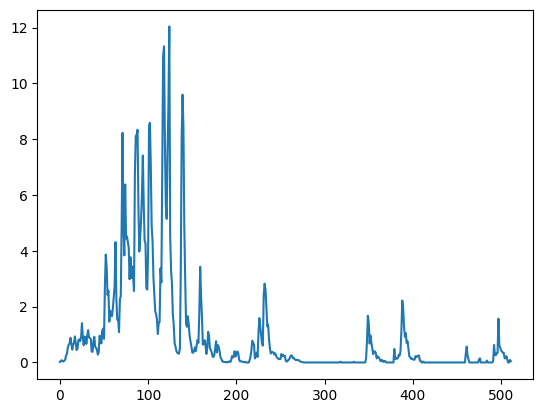

In [4]:
data = slice_power_of_2(pars_obj.rain_rate)
data = np.nan_to_num(data)
data = data / np.nanmean(data)
plt.plot(data)

In [5]:
tm_alpha, tm_c1 = get_um_params_tm(data)
dtm_alpha, dtm_c1 = get_alpha_c1_from_dtm(data,q)
[[tm_alpha, dtm_alpha], [tm_c1, dtm_c1]]

[[0.8279159697968804, 0.8155462788410194],
 [0.16097612875490247, 0.1616738836661621]]

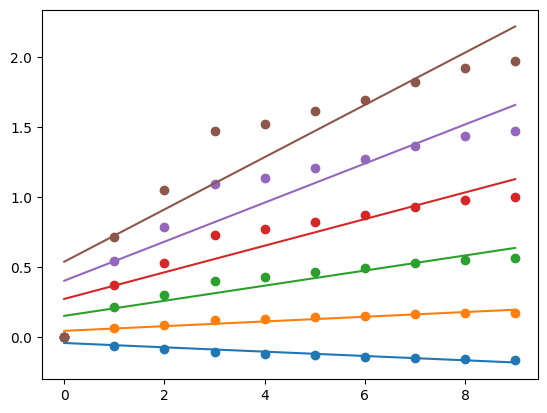

In [13]:
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
for q in np.linspace(0.9, 1.9, 6):
    x,y = get_trace_moment_points(data, q)
    ax.scatter(x,y)
    regr = RegressionSolution(x,y)
    a, b = regr.angular_coef, regr.linear_coef
    plt.plot((0,9), (b, a*9 + b))

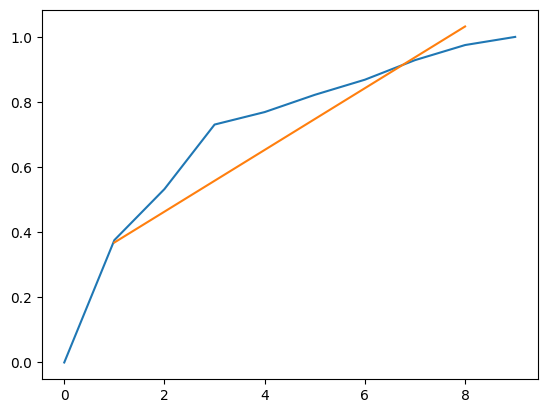

In [7]:
x,y = get_trace_moment_points(data, 1.5)
regr = RegressionSolution(x,y)
a, b = regr.angular_coef, regr.linear_coef
ln = lambda x: a*x + b
plt.plot(x,y)
plt.plot((1,8),(ln(1), ln(8)))

In [8]:
qs = np.linspace(0.9,1.1,11)
ks = np.array([k_of_q(data,q) for q in qs])
test_c1 = RegressionSolution(qs, ks).angular_coef

In [9]:
d1 = qs[1] - qs[0]
qs_ = qs[:-1] + d1/2
ks_ = np.array([(ks[i+1] - ks[i]) / d1 for i in range(qs.size -1)])
test_alpha = RegressionSolution(qs_, ks_).angular_coef/test_c1

In [10]:
qs_

array([0.91, 0.93, 0.95, 0.97, 0.99, 1.01, 1.03, 1.05, 1.07, 1.09])

In [11]:
test_alpha, test_c1

(0.8277023561816467, 0.1610353096847395)

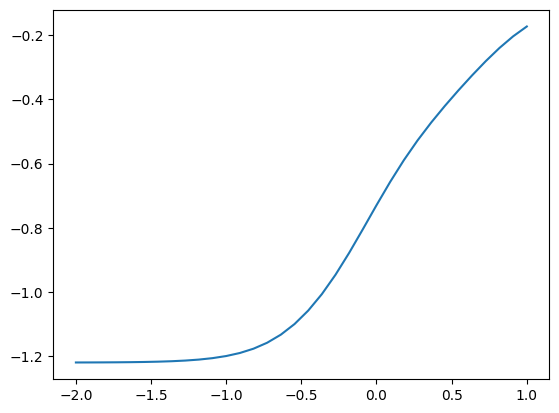

In [12]:
x, y = get_eta_vs_kqeta_points(data, q)
plt.plot(x,y)